In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
returnsant=pd.read_csv('returnsant.csv').drop('perf_date',axis=1)


In [283]:
def seasonalplustrend(x,data):
    iterations=195
    predict=np.zeros(iterations)
    res=np.zeros(iterations)
    res[0:5]=data[0:5]-np.mean(data[0:5])
    for i in range(4,iterations):
        predict[i]= x[0]*(res[i-4]) + x[1] + x[2]*np.sin(2*np.pi*x[3]* data[i-1]) +x[4]*np.cos(2*np.pi*x[5]*data[i-1])
        res[i]=data[i] - predict[i]
    return predict


In [284]:
def mse(x,data):
    return np.sum((seasonalplustrend(x,data) - data)**2)

In [285]:
from scipy.optimize import minimize
x0 = [1.3, 0.7, 0.8, 1.9, 1.2,1]
res = minimize(mse, x0, method='nelder-mead',args=(returnsant['Hedge Fund'][:]), options={'xatol': 1e-8, 'disp': True})

In [286]:
res.x

array([-2.53590098e-02,  9.25334783e-01,  1.16469996e-01,  1.47403773e-01,
       -9.17889959e-01,  1.79425601e-06])

In [287]:
seasonalplustrend(res.x,returnsant['Hedge Fund'][:])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.00891521,
        0.00384776,  0.00726264,  0.00926427,  0.01025329,  0.0086662 ,
        0.01127268,  0.00939133,  0.00974241,  0.01079157,  0.00723112,
        0.00852926,  0.00942476,  0.01080322,  0.00603901,  0.01128707,
        0.00390617,  0.00855483,  0.00928202,  0.00852422,  0.01067435,
       -0.00019236,  0.0097011 ,  0.00581646,  0.01245617,  0.00798542,
        0.00519398,  0.00203521,  0.00699123,  0.0081969 ,  0.01164892,
        0.00768542,  0.00581122,  0.01289323,  0.01496923,  0.00593511,
        0.00553944,  0.00916318,  0.00376478,  0.00253084,  0.00503456,
        0.00958047,  0.00734382,  0.00602835,  0.00942666,  0.00834613,
        0.01185472,  0.00292062,  0.00732733,  0.00864577,  0.01092155,
        0.00478046,  0.00785818,  0.00514299,  0.00951374,  0.01040729,
        0.00502026,  0.01296994,  0.01109011,  0.00678618,  0.00930395,
        0.00762736,  0.00982913,  0.01188959,  0.00531996,  0.00

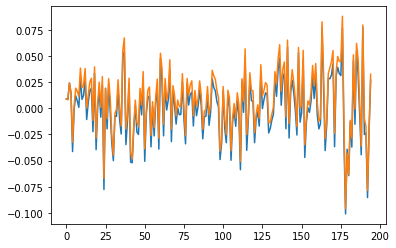

In [288]:
plt.plot(returnsant['Hedge Fund'][:]-seasonalplustrend(res.x,returnsant['Hedge Fund'][:]))
plt.plot(returnsant['Hedge Fund'][:])

In [271]:
returnsant.isnull().sum()

Hedge Fund                          0
Factor - Low Risk                   0
Factor - Value vs Growth            0
Factor - Fixed Income Carry         0
Factor - Local Equity               0
Factor - Trend Following            0
Factor - Commodities                0
Factor - Equity                     0
Factor - Foreign Exchange Carry     0
Factor - Small Cap                  0
Factor - Emerging Markets           0
Factor - Foreign Currency           0
Factor - Local Inflation            0
Factor - Equity Short Volatility    0
Factor - Credit                     0
Factor - Interest Rates             0
Factor - Crowding                   0
Factor - Momentum                   0
Factor - Quality                    0
pandas                              3
dtype: int64

In [272]:
returnsant=returnsant.drop('pandas',axis=1)

In [273]:
from pmdarima.arima import auto_arima
auto=auto_arima(returnsant['Hedge Fund'][0:160].values,returnsant.iloc[0:160,:].drop('Hedge Fund',axis=1).values, start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=0, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-706.933, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-651.142, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-674.542, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-702.812, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.171, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-701.676, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-710.570, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-711.921, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-710.717, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-710.175, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-715.996, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-704.785, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-712.747, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-712.773, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0]            

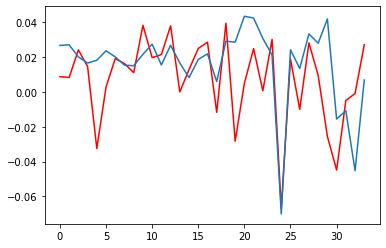

In [276]:
plt.plot(np.arange(0,34),returnsant['Hedge Fund'][:34]-seasonal,c='r')
plt.plot(auto.predict(34,returnsant.iloc[:34,:].drop('Hedge Fund',axis=1),c='b'))

In [56]:
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

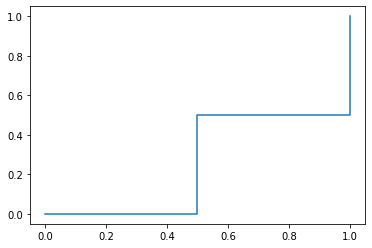

In [61]:
plt.plot(tpr,fpr )

In [62]:
!pip install stumpy

     |████████████████████████████████| 136 kB 17 kB/s eta 0:00:01


In [63]:
import stumpy

In [214]:
m = 4
mp = stumpy.stump(valuevsgrowth, m)

In [215]:
discord_idx = np.argsort(mp[:, 0])[-1]
discord_idx

127

In [219]:
nearest_neighbor_distance = mp[discord_idx, 0]
nearest_neighbor_distance

0.6611686727355656

In [220]:
motif_idx = np.argsort(mp[:, 0])[0]
nearest_neighbor_idx = mp[motif_idx, 1]
nearest_neighbor_idx 

64

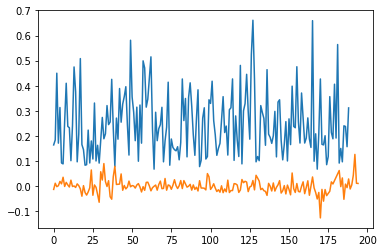

In [218]:
plt.plot(mp[:, 0])
plt.plot(valuevsgrowth)

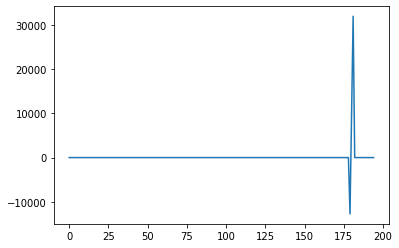

In [109]:
plt.plot(returnsant['Factor - Value vs Growth'])

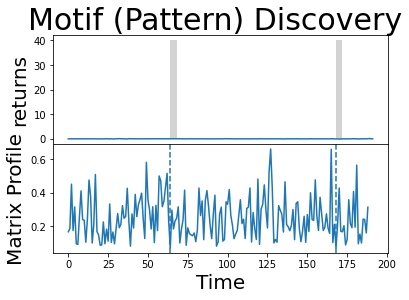

In [221]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(valuevsgrowth.values)
axs[0].set_ylabel('returns', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [222]:
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])


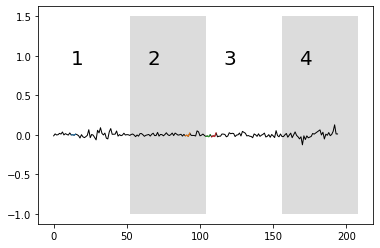

In [223]:
import itertools
plt.plot(valuevsgrowth, linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = valuevsgrowth.iloc[unanchored_chain[i]:unanchored_chain[i]+m]
    x = y.index.values
    plt.plot(x, y, linewidth=1)
color = itertools.cycle(['white', 'gainsboro'])
for i, x in enumerate(range(0, valuevsgrowth.shape[0], 52)):
    plt.text(x+12, 0.9, str(1+i), color="black", fontsize=20)
    rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)

plt.show()


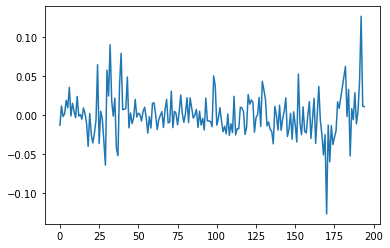

In [196]:
plt.plot(valuevsgrowth)

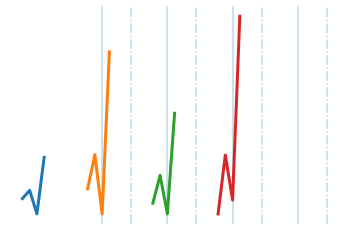

In [224]:

plt.axis('off')
for i in range(unanchored_chain.shape[0]):
    data = valuevsgrowth.iloc[unanchored_chain[i]:unanchored_chain[i]+m].reset_index().values
    x = data[:, 0]
    y = data[:, 1]
    plt.axvline(x=x[0]-x.min()+(m+5)*i + 11, alpha=0.3)
    plt.axvline(x=x[0]-x.min()+(m+5)*i + 15, alpha=0.3, linestyle='-.')
    plt.plot(x-x.min()+(m+5)*i, y-y.min(), linewidth=3)
plt.show()

In [174]:
data[:, 1]

array([-0.02559392, -0.01072888, -0.02209508,  0.02430033])

In [175]:
data[:, 0]

array([108., 109., 110., 111.])

In [159]:
valuevsgrowth[160:185]

160   -0.029574
161   -0.004832
162    0.021746
163   -0.035922
164    0.000393
165    0.036934
166   -0.006640
167   -0.025073
168   -0.050670
169   -0.024682
170   -0.126148
171   -0.012477
172   -0.059422
173   -0.013140
174   -0.037365
175   -0.028284
176   -0.019890
177    0.017355
178    0.008986
182    0.062680
183   -0.001573
184    0.033124
185   -0.052004
186    0.008566
187   -0.005550
Name: Factor - Value vs Growth, dtype: float64

In [240]:
def detect_outlier_position_by_fft(signal, threshold_freq=0.1,
                                   frequency_amplitude=.001):
    signal = signal.copy()
    fft_of_signal = np.fft.fft(signal)
    outlier = np.max(signal) if abs(np.max(signal)) > abs(np.min(signal)) else np.min(signal)
    if np.any(np.abs(fft_of_signal[threshold_freq:]) > frequency_amplitude):
        index_of_outlier = np.where(signal == outlier)
        return index_of_outlier[0]
    else:
        return None

In [241]:
outlier_idx = []

y = returnsant['Factor - Value vs Growth'].values

opt = dict(threshold_freq=0.01, frequency_amplitude=0.001)

win = 20
for k in range(win*2, y.size, win):
    idx = detect_outlier_position_by_fft(y[k-win:k+win], **opt)
    if idx is not None:
        outlier_idx.append(k + idx[0] - win)
outlier_idx = list(set(outlier_idx))

fig, ax = plt.subplots(figsize=(7, 2.75))

returnsant['Factor - Value vs Growth'].plot()
returnsant['Factor - Value vs Growth'][outlier_idx].plot(**kw)
_ = ax.set_ylim(-50, 50)

TypeError: slice indices must be integers or None or have an __index__ method

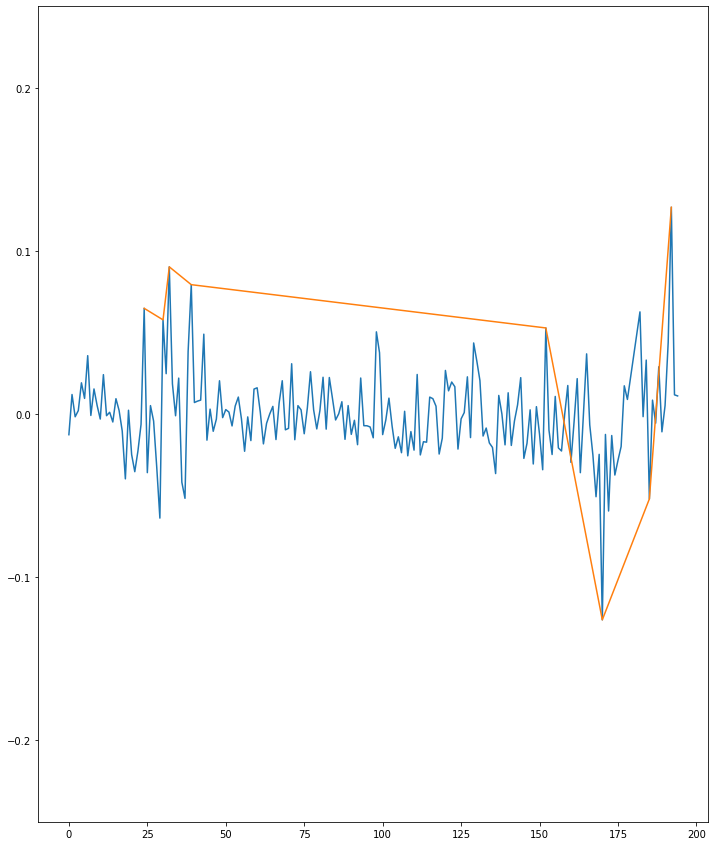

In [257]:
from pandas.core.window import Rolling
threshold = 0.05
rollingg =valuevsgrowth.rolling(window=4).mean()

difference = np.abs(valuevsgrowth- rollingg)
outlier_idx = difference > threshold

fig, ax = plt.subplots(figsize=(12,15))
valuevsgrowth.plot()
valuevsgrowth[outlier_idx].plot()
_ = ax.set_ylim(-0.25,0.25)

In [158]:
valuevsgrowth=valuevsgrowth.drop(179,axis=0)

In [154]:
valuevsgrowth=returnsant['Factor - Value vs Growth'].drop(181,axis=0)